In [1]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Sample 170A workflow-v47694-View Results-2023-04-27_16-23-58.csv to Sample 170A workflow-v47694-View Results-2023-04-27_16-23-58.csv


In [ ]:
import io
df2 = pd.read_csv(io.BytesIO(uploaded['Sample 170A workflow-v47694-View Results-2023-04-27_16-23-58.csv']))
# Dataset is now stored in a Pandas Dataframe

<ipython-input-33-d33046ca17c9>:2: DtypeWarning: Columns (5,12,14,32,33,34,35,40,41,42,44,46,47,57,59,61,62,65) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv(io.BytesIO(uploaded['Sample 170A workflow-v47694-View Results-2023-04-27_16-23-58.csv']))


In [ ]:
df3 = df2
df3.sort_values(by=['created_utc'])

,edited,ups,author,created_utc,id,distinguished,controversiality,author_flair_text,gilded,body,...,unrepliable_reason,author_is_blocked,author_cakeday,steward_reports,rte_mode,approved_at_utc,banned_at_utc,editable,date,sentiment_score
4180,False,1.0,[deleted],2010-08-20 15:44:39.0,c0x9yy1,NaN,0,NaN,0,[deleted],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010-08-20 00:00:00.0,0.0000
2980,True,0.0,mirite,2010-08-21 05:10:44.0,c0xc02n,NaN,0,NaN,0,"yes, it's hard to ignore the tumbleweeds; a fa...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010-08-21 00:00:00.0,0.1511
2580,False,1.0,[deleted],2010-08-22 08:21:50.0,c0xekbl,NaN,0,NaN,0,most people that end up graduating uci are pri...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010-08-22 00:00:00.0,-0.6632
4580,False,1.0,mirite,2010-08-22 15:49:12.0,c0xf1a7,NaN,0,NaN,0,1. untrue\n2. shitty excuse\n3. you're not hel...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010-08-22 00:00:00.0,-0.6355
3379,False,1.0,[deleted],2010-08-22 18:21:53.0,c0xfcvo,NaN,0,NaN,0,If people weren't so up tight around there a c...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010-08-22 00:00:00.0,0.1867
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,False,NaN,hannahhberlin,2023-04-15 06:26:11.0,jgbv107,NaN,0,High Winds Beware of Falling Branches [2024],0,It should show up regardless of whether you’ve...,...,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,2023-04-15 00:00:00.0,0.5801
500,False,NaN,picklesauce1203,2023-04-15 06:27:09.0,jgbv3k3,NaN,0,NaN,0,ohhhhh word that’s so weird. thanks sm for the...,...,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,2023-04-15 00:00:00.0,0.6032
2100,False,NaN,Ill_Substance9086,2023-04-15 06:34:23.0,jgbvmrw,NaN,0,NaN,0,Hey I am interested! Please dm me on discord a...,...,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,2023-04-15 00:00:00.0,0.3802
1299,False,NaN,pianoandgogi,2023-04-15 06:35:19.0,jgbvpbv,NaN,0,Biology B.S. [2023],0,what 3DS games do u guys play for those that s...,...,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,2023-04-15 00:00:00.0,0.4137


In [ ]:
import datetime
datevar = []

for i in range(len(df3)):
     temp = str(df3.loc[i, "created_utc"]).split("-")
     temp[2] = temp[2].split()
     datevar.append(datetime.date(int(temp[0]), int(temp[1]), int(temp[2][0])))
datevar

df3['datevar'] = datevar
df3['datevar']

0         2011-04-29
1         2011-04-29
2         2011-04-27
3         2011-04-26
4         2011-04-26
             ...    
461136    2021-11-15
461137    2021-11-15
461138    2021-11-15
461139    2021-11-15
461140    2021-11-15
Name: datevar, Length: 461141, dtype: object

In [ ]:
df4 = df3
df5 = df4.groupby(['datevar'])['sentiment_score'].mean().reset_index(name='monthly_sentiment')

In [8]:
from google.colab import files
uploaded2 = files.upload()

Saving ucdavis_sentiment_results.csv to ucdavis_sentiment_results.csv


In [9]:
import io
df8 = pd.read_csv(io.BytesIO(uploaded2['ucdavis_sentiment_results.csv']))
#df8 = df8.drop(df8.index[133])
df8
# Dataset is now stored in a Pandas Dataframe

,month,monthly_sentiment
0,2017-01,0.178524
1,2010-04,0.213544
2,2011-02,0.297934
3,2022-10,0.172254
4,2021-07,0.173935
...,...,...
155,2013-02,0.224626
156,2016-12,0.277002
157,2013-12,0.213197
158,2018-02,0.219823


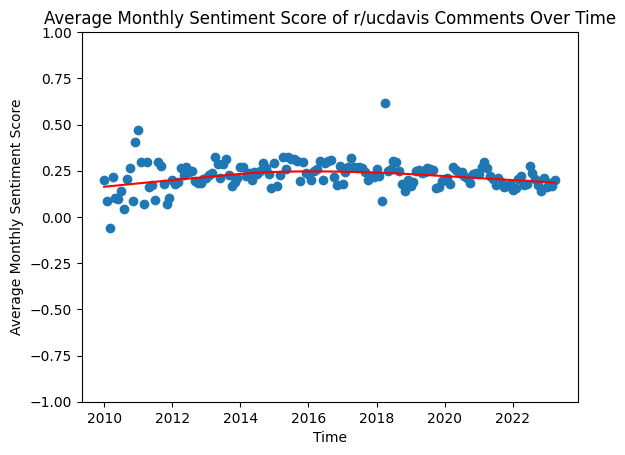

In [10]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Create a sample DataFrame

# Convert the year-month column to datetime format
df8['month'] = pd.to_datetime(df8['month'], format='%Y-%m')

# Fit a lowess regression model
lowess = sm.nonparametric.lowess(df8['monthly_sentiment'], df8['month'].astype('int64'))

# Plot the scatterplot and lowess regression line
plt.scatter(df8['month'], df8['monthly_sentiment'])
plt.plot(pd.to_datetime(lowess[:, 0]), lowess[:, 1], color='red')
plt.title('Average Monthly Sentiment Score of r/ucdavis Comments Over Time')
plt.xlabel('Time')
plt.ylabel('Average Monthly Sentiment Score')
plt.ylim(-1, 1)
plt.show()